### Load Libraries

In [1]:
import matplotlib.pyplot as plt
import os


from numpy import arange, array, cumsum
from pandas import read_csv, DataFrame
from numpy import zeros, median
from obspy import UTCDateTime
from numpy import isnan
from obspy import UTCDateTime

### Configurations

In [2]:
save = True

year = '2019'
cha  = 'BJZ'
mode = 'runq'

path = f'/home/andbro/Documents/ROMY/QualityCheck/{mode}/logs/'
path2plots = f'/home/andbro/Documents/ROMY/QualityCheck/{mode}/'

ifile = f'{year}_{cha}_overview'

sgnc_freq = {'Z': 551.68, 'U': 302.96, 'V': 448.09,'W': 448.09}

In [3]:
## read data
data = read_csv(path+ifile, delimiter=",")


## sort data frame in case any mixup occured
data = data.sort_values(by=['doy'], ascending=True, axis=0)


## check for doubles 
doubles = 0
if data.doy.duplicated().any():
    doubles +=1
print(f"\n {doubles} doubles found")


## extract November
data = data[(data.doy > 304) & (data.doy < 335)]
x1, x2  = 304.5, 334.5


 0 doubles found


#### Calculate daily shares

In [4]:
max_samples_per_day = max(data.total_samples)

q0p = data.Q0/max_samples_per_day*100
q1p = data.Q1/max_samples_per_day*100
q2p = data.Q2/max_samples_per_day*100

#### Define month labels

In [5]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
months = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30 ,31, 30]
m_cum = cumsum(months)+1


# Check with Log File

In [6]:
log_no_data = f"{path}{year}-{cha}.log"

if os.path.isfile(f"{path}{year}-{cha}.log"):
    
    no_data = read_csv(log_no_data, header=0, names =["Date", "Channel", "Comment"])

    doy = []
    for i in no_data.Date.to_list():
        doy.append(UTCDateTime(i).julday)

    no_data["doy"] = doy    
    
else:
    print("no log file found !")
    no_data = DataFrame()
    no_data["doy"] = []

no log file found !


# Plot Quality Overview

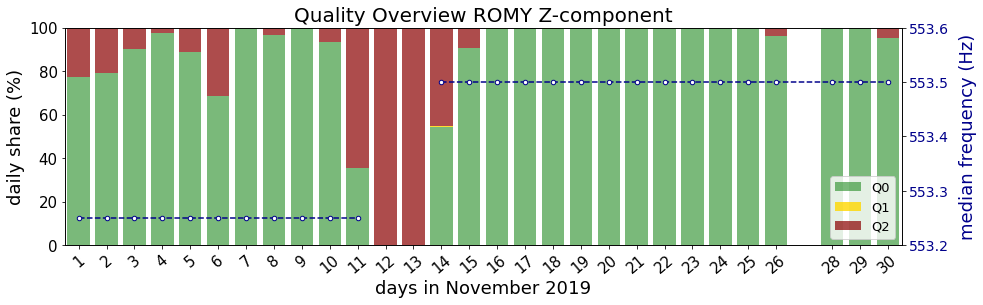

In [7]:
def __makeplot():

    fig, ax = plt.subplots(1, 1, figsize=(15,4))

    font=16

    width=0.8
    ax.bar(data.doy, q0p, width, color="forestgreen", alpha=0.6, label="Q0", edgecolor=None, aa=True)
    ax.bar(data.doy, q1p, width,bottom=q0p, color="gold", alpha=0.8, label="Q1", edgecolor=None, aa=True)
    ax.bar(data.doy, q2p, width,bottom=q0p+q1p, color="darkred", alpha=0.7, label="Q2", edgecolor=None, aa=True)

    # ax.plot(data.doy, data.bad_areas/data.Q2*100, zorder=1, color='black', ls='--', lw=0.8)


#     for gap in gaps:
#         ax.bar(gap, 100, width=width, color="grey", alpha=0.3, zorder=2, aa=True)


    ax.set_ylim(0,100)
    # ax.set_xticks(m_cum)
    # ax.set_xticklabels(month_names, rotation=20)

    ax.set_xticks(data.doy)
    ax.set_xticklabels(data.doy-304, rotation=40)


#     ax.axhline(95, color='black', ls=':', label="95%")

    ax.set_ylabel("daily share (%)", fontsize=font+2)
    ax.set_xlabel(f"days in November {year}", fontsize=font+2)

    ax.tick_params(axis='both', labelsize=font-1)

    ax.set_title(f"Quality Overview ROMY {cha[-1]}-component", fontsize=font+4)

    ax.legend(fontsize=font-3, loc="lower right")

    ax.set_xlim(x1,x2)


    ## add second access
    ax2 = ax.twinx()

    col2 = "darkblue"
    
    ax2.plot(data.doy, data.frequency_med, color=col2, ls='--', zorder=1)
    ax2.scatter(data.doy, data.frequency_med, color=col2, s=20, fc="white", label=r"f$_{median}$", zorder=2)

#     ax2.plot(data.doy, data.contrast, color=col2, ls='--', zorder=1)
#     ax2.scatter(data.doy, data.contrast, color=col2, s=20, fc="white", label=r"f$_{median}$", zorder=2)

    ax2.tick_params(axis='both', labelsize=font-2, labelcolor=col2)
    ax2.set_ylabel("median frequency (Hz)", fontsize=font+2, color=col2, labelpad=10)

    if cha == "BJZ":
        ax2.set_ylim(553.2, 553.6)
    if cha == "BJU":
        ax2.set_ylim(302.5, 303.0)
    if cha == "BJV":
        ax2.set_ylim(447.7, 447.8)

    plt.show();
    
    return fig


## _____________________________________

fig = __makeplot()


if save:
    fig.savefig(path2plots+"figs/"+f"{year}_{cha}_statistics_overview_zoomin.png", format="png", dpi=300)

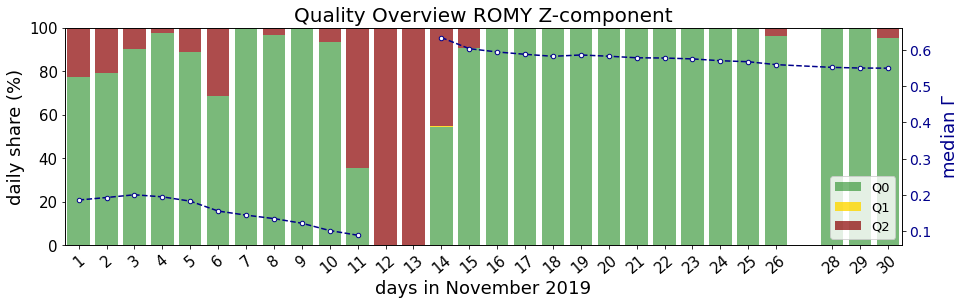

In [8]:
def __makeplot2():

    fig, ax = plt.subplots(1, 1, figsize=(15,4))

    font=16

    width=0.8
    ax.bar(data.doy, q0p, width, color="forestgreen", alpha=0.6, label="Q0", edgecolor=None, aa=True)
    ax.bar(data.doy, q1p, width,bottom=q0p, color="gold", alpha=0.8, label="Q1", edgecolor=None, aa=True)
    ax.bar(data.doy, q2p, width,bottom=q0p+q1p, color="darkred", alpha=0.7, label="Q2", edgecolor=None, aa=True)

    # ax.plot(data.doy, data.bad_areas/data.Q2*100, zorder=1, color='black', ls='--', lw=0.8)


#     for gap in gaps:
#         ax.bar(gap, 100, width=width, color="grey", alpha=0.3, zorder=2, aa=True)


    ax.set_ylim(0,100)
    # ax.set_xticks(m_cum)
    # ax.set_xticklabels(month_names, rotation=20)

    ax.set_xticks(data.doy)
    ax.set_xticklabels(data.doy-304, rotation=40)


#     ax.axhline(95, color='black', ls=':', label="95%")

    ax.set_ylabel("daily share (%)", fontsize=font+2)
    ax.set_xlabel(f"days in November {year}", fontsize=font+2)

    ax.tick_params(axis='both', labelsize=font-1)

    ax.set_title(f"Quality Overview ROMY {cha[-1]}-component", fontsize=font+4)

    ax.legend(fontsize=font-3, loc="lower right")

    ax.set_xlim(x1,x2)


    ## add second access
    ax2 = ax.twinx()

    col2 = "darkblue"
    
    ax2.plot(data.doy, data.contrast, color=col2, ls='--', zorder=1)
    ax2.scatter(data.doy, data.contrast, color=col2, s=20, fc="white", label=r"$\Gamma_{median}$", zorder=2)

    ax2.tick_params(axis='both', labelsize=font-2, labelcolor=col2)
    ax2.set_ylabel(r"median $\Gamma$", fontsize=font+2, color=col2, labelpad=10)


    plt.show();
    
    return fig


## _____________________________________

fig = __makeplot2()


if save:
    fig.savefig(path2plots+"figs/"+f"{year}_{cha}_statistics_overview_zoomin.png", format="png", dpi=300)

In [9]:
print(f'{data.frequency_med.median()} +- {round(data.frequency_med.std(),3)} Hz')

553.5 +- 0.125 Hz
